In [32]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib as mpl
import scipy.stats as stats
import matplotlib.pyplot as plt
from os import listdir
#from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler

folder_path = '/content/drive/MyDrive/ML_Project'
datasets_path = '/content/drive/MyDrive/ML_Project/datasets'

In [33]:
#drive.mount('/content/drive/')
df = pd.read_csv(f'datasets/score.csv')

In [34]:
df.shape

(500, 50)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_am         496 non-null    float64
 1   profit_last_am    496 non-null    float64
 2   profit_am         496 non-null    float64
 3   damage_am         497 non-null    float64
 4   damage_inc        496 non-null    float64
 5   crd_lim_rec       496 non-null    float64
 6   credit_use_ic     496 non-null    float64
 7   gluten_ic         496 non-null    float64
 8   lactose_ic        496 non-null    float64
 9   insurance_ic      496 non-null    float64
 10  spa_ic            498 non-null    float64
 11  empl_ic           500 non-null    float64
 12  cab_requests      495 non-null    float64
 13  married_cd        500 non-null    bool   
 14  bar_no            496 non-null    float64
 15  sport_ic          496 non-null    float64
 16  neighbor_income   479 non-null    float64
 1

In [36]:
df.isnull().sum()[df.isnull().sum() != 0]

income_am             4
profit_last_am        4
profit_am             4
damage_am             3
damage_inc            4
crd_lim_rec           4
credit_use_ic         4
gluten_ic             4
lactose_ic            4
insurance_ic          4
spa_ic                2
cab_requests          5
bar_no                4
sport_ic              4
neighbor_income      21
age                   4
marketing_permit      4
urban_ic              4
dining_ic             5
presidential          5
client_segment        4
sect_empl             4
prev_stay             4
prev_all_in_stay      4
divorce               4
fam_adult_size        4
children_no           4
tenure_mts           39
tenure_yrs           39
company_ic            4
claims_no             4
claims_am             1
nights_booked         4
gender                4
shop_am               4
shop_use              5
retired               4
gold_status           4
score1_pos          378
score1_neg          366
score2_pos          389
score2_neg      

In [37]:
(5000-df.isnull().sum()[df.isnull().sum() != 0])/5000*100

income_am           99.92
profit_last_am      99.92
profit_am           99.92
damage_am           99.94
damage_inc          99.92
crd_lim_rec         99.92
credit_use_ic       99.92
gluten_ic           99.92
lactose_ic          99.92
insurance_ic        99.92
spa_ic              99.96
cab_requests        99.90
bar_no              99.92
sport_ic            99.92
neighbor_income     99.58
age                 99.92
marketing_permit    99.92
urban_ic            99.92
dining_ic           99.90
presidential        99.90
client_segment      99.92
sect_empl           99.92
prev_stay           99.92
prev_all_in_stay    99.92
divorce             99.92
fam_adult_size      99.92
children_no         99.92
tenure_mts          99.22
tenure_yrs          99.22
company_ic          99.92
claims_no           99.92
claims_am           99.98
nights_booked       99.92
gender              99.92
shop_am             99.92
shop_use            99.90
retired             99.92
gold_status         99.92
score1_pos  

In [38]:
df_no_dup = df.copy()
df_no_dup.drop_duplicates()
df_no_dup.shape

(500, 50)

In [39]:
df_converted = df_no_dup.copy()

In [40]:
bools = ['credit_use_ic', 'gluten_ic', 'lactose_ic', 'insurance_ic', 
           'spa_ic', 'empl_ic', 'married_cd', 'sport_ic', 'marketing_permit',
           'urban_ic', 'dining_ic', 'presidential', 'prev_stay',
           'prev_all_in_stay', 'divorce', 'company_ic', 'shop_use', 'retired', 'gold_status']

df_converted['married_cd'] = df_converted['married_cd']*1

new_names = {}

for col in bools:
  df_converted[col] = df_converted[col].astype('category')

  if '_ic' not in col:
    new_name = f"{col}_ic"
    new_names[col] = new_name

df_converted = df_converted.rename(columns=new_names)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_am         496 non-null    float64
 1   profit_last_am    496 non-null    float64
 2   profit_am         496 non-null    float64
 3   damage_am         497 non-null    float64
 4   damage_inc        496 non-null    float64
 5   crd_lim_rec       496 non-null    float64
 6   credit_use_ic     496 non-null    float64
 7   gluten_ic         496 non-null    float64
 8   lactose_ic        496 non-null    float64
 9   insurance_ic      496 non-null    float64
 10  spa_ic            498 non-null    float64
 11  empl_ic           500 non-null    float64
 12  cab_requests      495 non-null    float64
 13  married_cd        500 non-null    bool   
 14  bar_no            496 non-null    float64
 15  sport_ic          496 non-null    float64
 16  neighbor_income   479 non-null    float64
 1

In [42]:
df_converted.iloc[:,0:20].describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd_ic,bar_no,sport_ic,neighbor_income,age,marketing_permit_ic,urban_ic
count,496.000000,496.000000,496.000000,497.000000,496.000000,496.000000,496.0,496.0,496.0,496.0,498.0,500.0,495.000000,500.0,496.000000,496.0,479.000000,496.000000,496.0,496.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,479.0,484.0,451.0,305.0,322.0,493.0,NaN,403.0,NaN,357.0,NaN,NaN,250.0,435.0
mean,2573.516129,633.254032,3891.360887,148.293763,0.385081,3388.104839,NaN,NaN,NaN,NaN,NaN,NaN,5.886869,NaN,5.572581,NaN,32676.807933,44.336694,NaN,NaN
std,7019.691435,1136.802174,5284.425448,436.478086,0.911708,4620.095504,NaN,NaN,NaN,NaN,NaN,NaN,2.936461,NaN,4.465669,NaN,6170.830312,15.834419,NaN,NaN
min,227.000000,0.000000,1620.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,15088.000000,16.000000,NaN,NaN
25%,232.500000,0.000000,1637.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,3.000000,NaN,28884.000000,32.000000,NaN,NaN
50%,528.500000,101.500000,1955.000000,0.000000,0.000000,750.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,5.000000,NaN,32155.000000,44.000000,NaN,NaN
75%,2223.750000,817.000000,3578.500000,0.000000,0.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,8.000000,NaN,35774.500000,56.000000,NaN,NaN


In [43]:
df_converted.iloc[:,20:40].describe(include='all')

,dining_ic,presidential_ic,client_segment,sect_empl,prev_stay_ic,prev_all_in_stay_ic,divorce_ic,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use_ic,retired_ic,gold_status_ic
count,495.0,495.0,496.000000,496.000000,496.0,496.0,496.0,496.000000,496.000000,461.000000,461.000000,496.0,496.00000,499.000000,496.000000,496,496.000000,495.0,496.0,496.0
unique,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,2.0,2.0,2.0
top,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,V,NaN,0.0,0.0,0.0
freq,470.0,494.0,NaN,NaN,446.0,367.0,444.0,NaN,NaN,NaN,NaN,489.0,NaN,NaN,NaN,252,NaN,416.0,410.0,466.0
mean,NaN,NaN,1.336694,0.191532,NaN,NaN,NaN,1.993952,0.379032,278.329718,23.206074,NaN,0.18750,43.376754,28.741935,NaN,417.674226,NaN,NaN,NaN
std,NaN,NaN,0.797436,0.815016,NaN,NaN,NaN,0.787506,0.853681,154.455565,12.865645,NaN,0.65684,477.476043,39.759808,NaN,1397.625326,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,166.000000,14.000000,NaN,0.00000,0.000000,4.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000,273.000000,23.000000,NaN,0.00000,0.000000,6.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,3.000000,0.000000,376.000000,31.000000,NaN,0.00000,0.000000,43.000000,NaN,0.000000,NaN,NaN,NaN


In [44]:
df_converted.iloc[:,40:55].describe(include='all')

,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg
count,122.000000,134.000000,111.000000,124.000000,136.000000,145.000000,119.000000,126.000000,132.000000,154.000000
mean,0.519385,0.499418,0.501727,0.524469,0.495096,0.485360,0.537287,0.494252,0.504806,4.826028
std,0.296407,0.293777,0.281859,0.281483,0.286895,0.292992,0.288562,0.297017,0.303785,2.843074
min,0.005318,0.016512,0.000767,0.002151,0.020657,0.009849,0.010242,0.013659,0.005136,-4.092944
25%,0.294621,0.251502,0.279851,0.307677,0.239524,0.252781,0.301039,0.205913,0.257488,2.744401
50%,0.531987,0.479703,0.488407,0.492698,0.498884,0.447901,0.592578,0.487373,0.469705,4.839778
75%,0.777602,0.765155,0.745293,0.780450,0.775543,0.747820,0.779311,0.780295,0.796048,6.825558
max,0.997703,1.000000,1.000000,1.000000,0.971706,0.986639,0.997018,0.985003,0.991246,12.113542


array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'damage_inc'}>],
       [<AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>,
        <AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>],
       [<AxesSubplot:title={'center':'tenure_yrs'}>,
        <AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'n

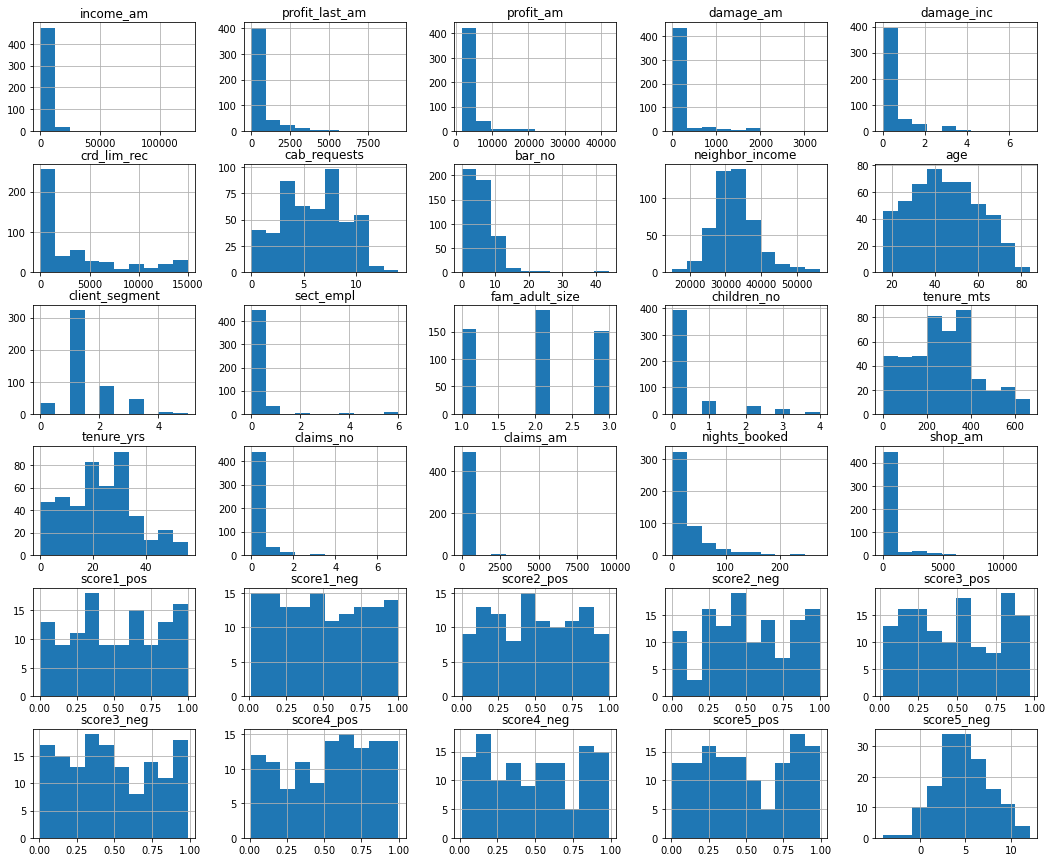

In [45]:
df_converted.hist( figsize = (18,15))

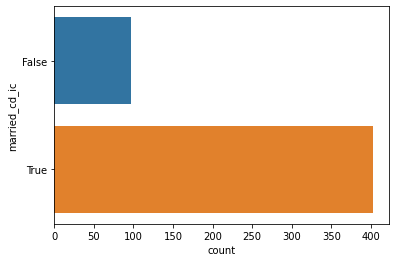

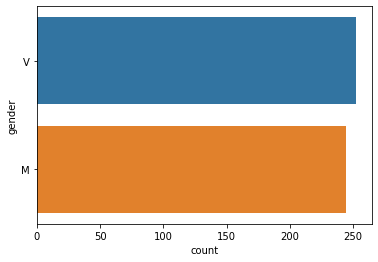

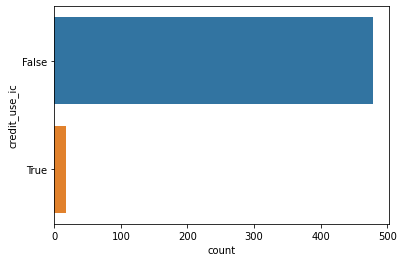

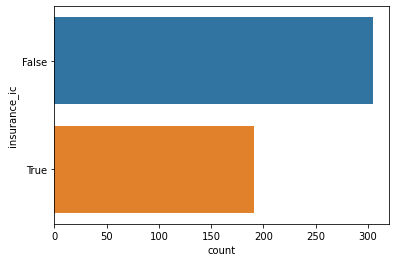

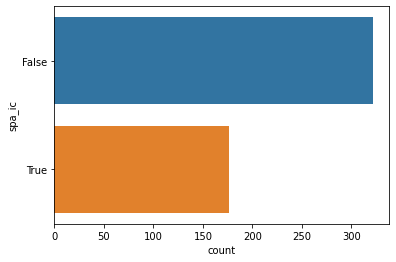

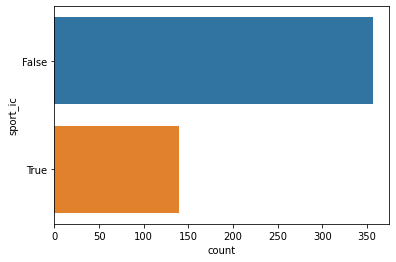

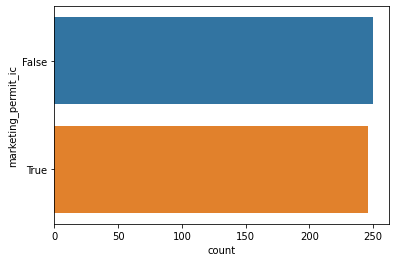

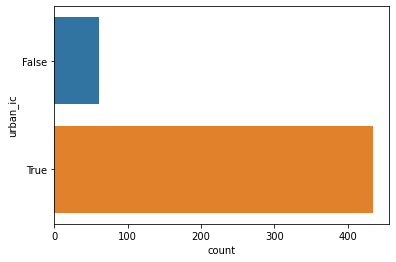

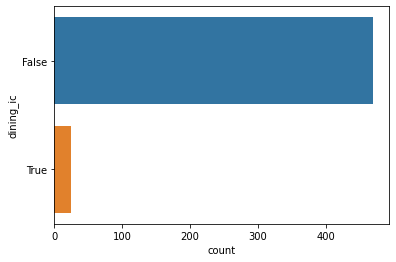

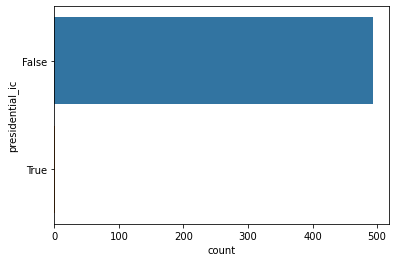

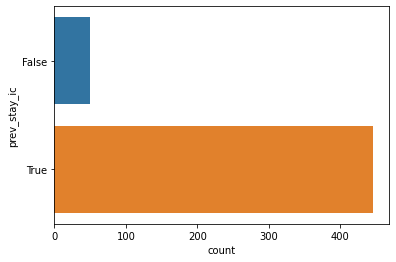

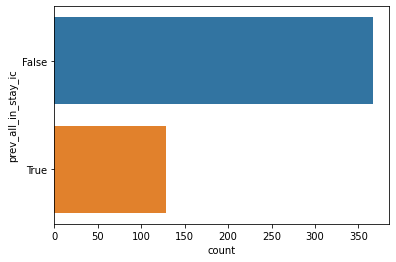

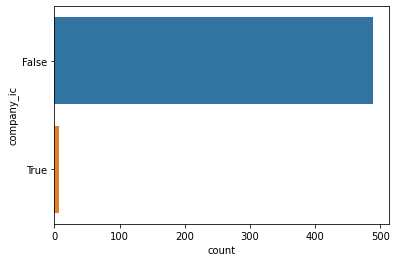

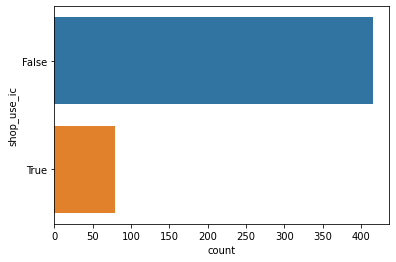

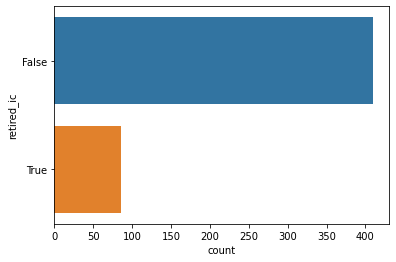

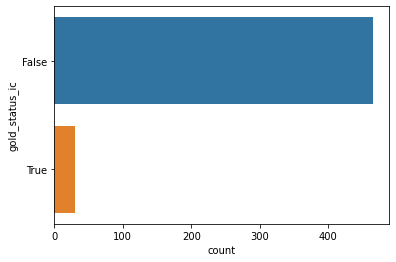

In [49]:
categorical = ['married_cd_ic', 'gender','credit_use_ic','insurance_ic','spa_ic',
               'sport_ic','marketing_permit_ic','urban_ic','dining_ic','presidential_ic','prev_stay_ic','prev_all_in_stay_ic',
               'company_ic','shop_use_ic','retired_ic','gold_status_ic']

for col in categorical:
    df_converted[col] = df_converted[col].replace(0.0,'False')
    df_converted[col] = df_converted[col].replace(1.0,'True')

for i in categorical: 
    sns.countplot(y=df_converted[i])
    plt.show()

In [50]:
df_converted = df_converted.drop(['tenure_yrs', 'gluten_ic', 'lactose_ic','empl_ic', "divorce_ic",'score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],1)

C:\Users\robbe\AppData\Local\Temp/ipykernel_11124/2250700739.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_converted = df_converted.drop(['tenure_yrs', 'gluten_ic', 'lactose_ic','empl_ic', "divorce_ic",'score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],1)


In [51]:
df_imputed = df_converted.copy()

In [52]:
df_imputed['client_segment'] = df_imputed['client_segment'].astype('object')

num_feat = df_imputed.select_dtypes(include=['int64', 'float64']).columns
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(df_imputed[num_feat])
df_imputed[num_feat] = mean_imputer.transform(df_imputed[num_feat].values)

C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [53]:
categoricals = ['gender', 'credit_use_ic', 'insurance_ic', 
           'spa_ic', 'married_cd_ic', 'sport_ic', 'marketing_permit_ic',
           'urban_ic', 'dining_ic','presidential_ic', 'prev_stay_ic', 'prev_all_in_stay_ic',
          'company_ic','shop_use_ic','retired_ic','gold_status_ic']

df_imputed['gender'] = df_imputed['gender'].astype('category')
for col in categoricals:
    df_imputed[col] = df_imputed[col].cat.add_categories('Undefined')
    df_imputed[col] = df_imputed[col].fillna('Undefined')
    df_imputed[col] = df_imputed[col].astype('object')

In [54]:
df_dummy_var = df_imputed.copy()
obj_feat = df_dummy_var.select_dtypes(include=['object']).columns

for col in obj_feat:
  dummies = pd.get_dummies(df_dummy_var[col], dummy_na=False, prefix=col)  
  df_dummy_var = pd.concat([df_dummy_var, dummies],axis=1)                   
  df_dummy_var.drop(columns=[col], inplace=True)

In [55]:
def null_amounts(df):
  print(df.isnull().sum()[df.isnull().sum() != 0.0])

In [56]:
null_amounts(df_dummy_var)

Series([], dtype: int64)


array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>],
       [<AxesSubplot:title={'center':'damage_inc'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>],
       [<AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sect_empl'}>,
        <AxesSubplot:title={'center':'fam_adult_size'}>],
       [<AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>,
        <AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>],
       [<AxesSubplot:title={'center':'nights_booked'}>,
        <AxesSubplot:title={'center':'shop_am'}>, <AxesSubplot:>,
        <AxesSubplot:>]], 

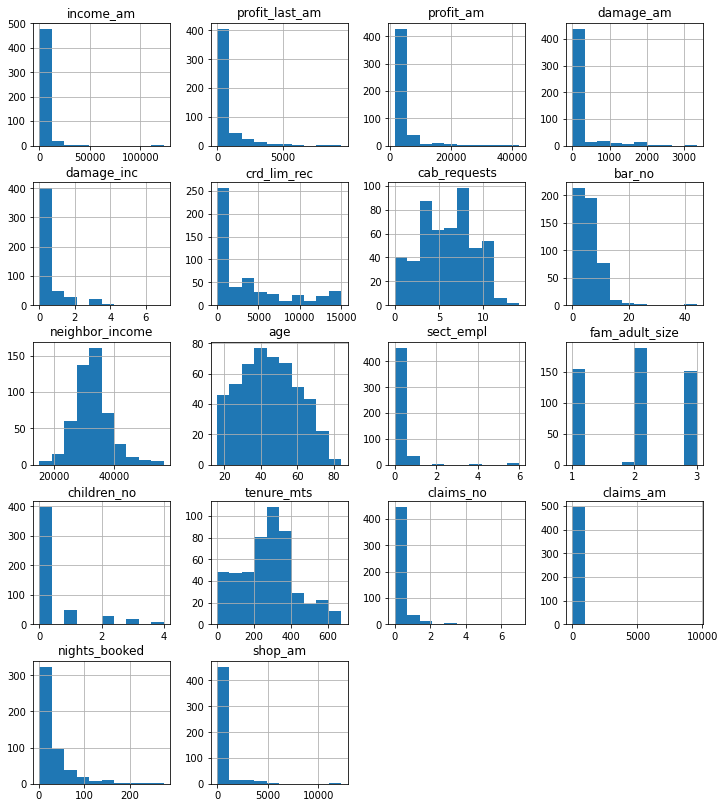

In [57]:
df_transformed = df_dummy_var.copy()

num = df_transformed.select_dtypes(include=['int64', 'float64']).columns
#num = num.drop(['outcome_damage_inc'],1)
df_transformed[num].hist( figsize = (12,14))

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>],
       [<AxesSubplot:title={'center':'damage_inc'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>],
       [<AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sect_empl'}>,
        <AxesSubplot:title={'center':'fam_adult_size'}>],
       [<AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>,
        <AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>],
       [<AxesSubplot:title={'center':'nights_booked'}>,
        <AxesSubplot:title={'center':'shop_am'}>, <AxesSubplot:>,
        <AxesSubplot:>]], 

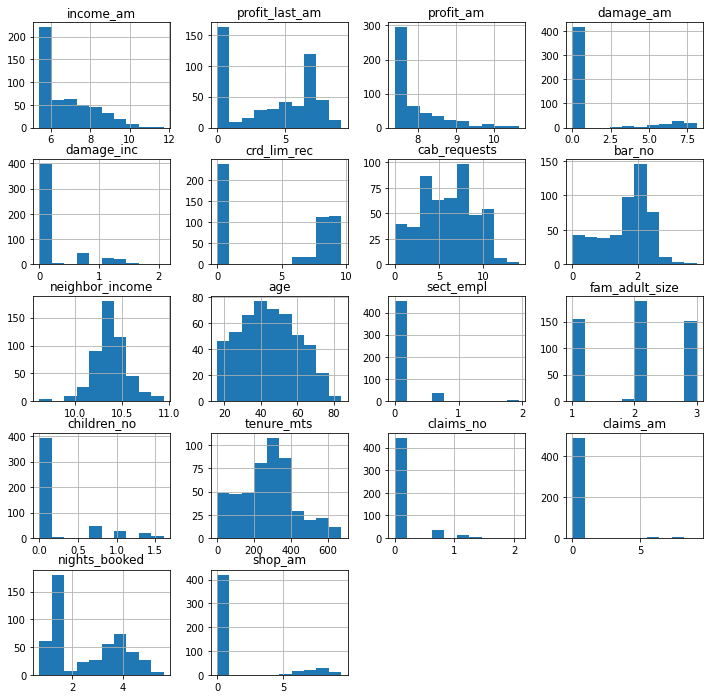

In [58]:
skewed = df_transformed[num].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df_transformed[skewed] = np.log1p(df_transformed[skewed])
df_transformed[num].hist( figsize = (12,12))

In [60]:
num_feat = df_transformed.select_dtypes(include=['int64', 'float64']).columns

scaler = RobustScaler()
scaler.fit(df_transformed[num_feat])
df_transformed[num_feat] = scaler.transform(df_transformed[num_feat])

score_transformed = df_transformed.copy()

score_transformed.to_csv('datasets/score_cleaned.csv', index=False)